store--->:  no
entered True line
Year 2013: 12271
Year 2014: 43796
Year 2015: 39362
Montag: 11099
Dienstag: 12309
Mittwoch: 13060
Donnerstag: 13113
Freitag: 15680
Samstag: 20831
Sonntag: 9337
MonthJanTotal: 8038
MonthFebTotal: 6983
MonthMarTotal: 8142
MonthAprTotal: 7264
MonthMayTotal: 7927
MonthJunTotal: 6936
MonthJulTotal: 7314
MonthAugTotal: 7535
MonthSepTotal: 6932
MonthOctTotal: 11742
MonthNovTotal: 9410
MonthDecTotal: 7206
CALAMARI Inventory: 3232
FISCH Inventory: 3562
GARNELEN Inventory: 7615
HAEHNCHEN Inventory: 23101
KOEFTE Inventory: 16788
LAMM Inventory: 24046
STEAK Inventory: 17085
TOTAL_FISCHPROD Inventory: 14409
TOTAL_FLEISCH Inventory: 81020


,Sr.No.,DEMAND_DATE,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,MONTH_JAN,MONTH_FEB,MONTH_MAR,MONTH_APR,MONTH_MAY,MONTH_JUN,MONTH_JUL,MONTH_AUG,MONTH_SEP,MONTH_OCT,MONTH_NOV,MONTH_DEC,YEAR_2013,YEAR_2014,YEAR_2015,CALAMARI,FISCH,GARNELEN,HAEHNCHEN,KOEFTE,LAMM,STEAK,TOTAL_FISCHPROD,TOTAL_FLEISCH,TOTAL,CALAMARI_DEMAND_T1,CALAMARI_DEMAND_T2,CALAMARI_DEMAND_T3,CALAMARI_DEMAND_T4,CALAMARI_DEMAND_T5,CALAMARI_DEMAND_T6,CALAMARI_DEMAND_T7,FISCH_DEMAND_T1,FISCH_DEMAND_T2,FISCH_DEMAND_T3,FISCH_DEMAND_T4,FISCH_DEMAND_T5,FISCH_DEMAND_T6,FISCH_DEMAND_T7,GARNELEN_DEMAND_T1,GARNELEN_DEMAND_T2,GARNELEN_DEMAND_T3,GARNELEN_DEMAND_T4,GARNELEN_DEMAND_T5,GARNELEN_DEMAND_T6,GARNELEN_DEMAND_T7,HAEHNCHEN_DEMAND_T1,HAEHNCHEN_DEMAND_T2,HAEHNCHEN_DEMAND_T3,HAEHNCHEN_DEMAND_T4,HAEHNCHEN_DEMAND_T5,HAEHNCHEN_DEMAND_T6,HAEHNCHEN_DEMAND_T7,KOEFTE_DEMAND_T1,KOEFTE_DEMAND_T2,KOEFTE_DEMAND_T3,KOEFTE_DEMAND_T4,KOEFTE_DEMAND_T5,KOEFTE_DEMAND_T6,KOEFTE_DEMAND_T7,LAMM_DEMAND_T1,LAMM_DEMAND_T2,LAMM_DEMAND_T3,LAMM_DEMAND_T4,LAMM_DEMAND_T5,LAMM_DEMAND_T6,LAMM_DEMAND_T7,STEAK_DEMAND_T1,STEAK_DEMAND_T2,STEAK_DEMAND_T3,STEAK_DEMAND_T4,STEAK_DEMAND_T5,STEAK_DEMAND_T6,STEAK_DEMAND_T7,TOTAL_FISCHPROD_DEMAND_T1,TOTAL_FISCHPROD_DEMAND_T2,TOTAL_FISCHPROD_DEMAND_T3,TOTAL_FISCHPROD_DEMAND_T4,TOTAL_FISCHPROD_DEMAND_T5,TOTAL_FISCHPROD_DEMAND_T6,TOTAL_FISCHPROD_DEMAND_T7,TOTAL_FLEISCH_DEMAND_T1,TOTAL_FLEISCH_DEMAND_T2,TOTAL_FLEISCH_DEMAND_T3,TOTAL_FLEISCH_DEMAND_T4,TOTAL_FLEISCH_DEMAND_T5,TOTAL_FLEISCH_DEMAND_T6,TOTAL_FLEISCH_DEMAND_T7,TOTAL_DEMAND_T1,TOTAL_DEMAND_T2,TOTAL_DEMAND_T3,TOTAL_DEMAND_T4,TOTAL_DEMAND_T5,TOTAL_DEMAND_T6,TOTAL_DEMAND_T7,CALAMARI_CUM_DEMAND_T2,CALAMARI_CUM_DEMAND_T3,CALAMARI_CUM_DEMAND_T4,CALAMARI_CUM_DEMAND_T5,CALAMARI_CUM_DEMAND_T6,CALAMARI_CUM_DEMAND_T7,FISCH_CUM_DEMAND_T2,FISCH_CUM_DEMAND_T3,FISCH_CUM_DEMAND_T4,FISCH_CUM_DEMAND_T5,FISCH_CUM_DEMAND_T6,FISCH_CUM_DEMAND_T7,GARNELEN_CUM_DEMAND_T2,GARNELEN_CUM_DEMAND_T3,GARNELEN_CUM_DEMAND_T4,GARNELEN_CUM_DEMAND_T5,GARNELEN_CUM_DEMAND_T6,GARNELEN_CUM_DEMAND_T7,HAEHNCHEN_CUM_DEMAND_T2,HAEHNCHEN_CUM_DEMAND_T3,HAEHNCHEN_CUM_DEMAND_T4,HAEHNCHEN_CUM_DEMAND_T5,HAEHNCHEN_CUM_DEMAND_T6,HAEHNCHEN_CUM_DEMAND_T7,KOEFTE_CUM_DEMAND_T2,KOEFTE_CUM_DEMAND_T3,KOEFTE_CUM_DEMAND_T4,KOEFTE_CUM_DEMAND_T5,KOEFTE_CUM_DEMAND_T6,KOEFTE_CUM_DEMAND_T7,LAMM_CUM_DEMAND_T2,LAMM_CUM_DEMAND_T3,LAMM_CUM_DEMAND_T4,LAMM_CUM_DEMAND_T5,LAMM_CUM_DEMAND_T6,LAMM_CUM_DEMAND_T7,STEAK_CUM_DEMAND_T2,STEAK_CUM_DEMAND_T3,STEAK_CUM_DEMAND_T4,STEAK_CUM_DEMAND_T5,STEAK_CUM_DEMAND_T6,STEAK_CUM_DEMAND_T7,TOTAL_FISCHPROD_CUM_DEMAND_T2,TOTAL_FISCHPROD_CUM_DEMAND_T3,TOTAL_FISCHPROD_CUM_DEMAND_T4,TOTAL_FISCHPROD_CUM_DEMAND_T5,TOTAL_FISCHPROD_CUM_DEMAND_T6,TOTAL_FISCHPROD_CUM_DEMAND_T7,TOTAL_FLEISCH_CUM_DEMAND_T2,TOTAL_FLEISCH_CUM_DEMAND_T3,TOTAL_FLEISCH_CUM_DEMAND_T4,TOTAL_FLEISCH_CUM_DEMAND_T5,TOTAL_FLEISCH_CUM_DEMAND_T6,TOTAL_FLEISCH_CUM_DEMAND_T7,TOTAL_CUM_DEMAND_T2,TOTAL_CUM_DEMAND_T3,TOTAL_CUM_DEMAND_T4,TOTAL_CUM_DEMAND_T5,TOTAL_CUM_DEMAND_T6,TOTAL_CUM_DEMAND_T7,CALAMARI_HML_DEMAND_T7,FISCH_HML_DEMAND_T7,GARNELEN_HML_DEMAND_T7,HAEHNCHEN_HML_DEMAND_T7,KOEFTE_HML_DEMAND_T7,LAMM_HML_DEMAND_T7,STEAK_HML_DEMAND_T7,TOTAL_FISCHPROD_HML_DEMAND_T7,TOTAL_FLEISCH_HML_DEMAND_T7,TOTAL_HML_DEMAND_T7,CALAMARI_NO_DAYS_ABOVE_7D_MEAN,FISCH_NO_DAYS_ABOVE_7D_MEAN,GARNELEN_NO_DAYS_ABOVE_7D_MEAN,HAEHNCHEN_NO_DAYS_ABOVE_7D_MEAN,KOEFTE_NO_DAYS_ABOVE_7D_MEAN,LAMM_NO_DAYS_ABOVE_7D_MEAN,STEAK_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_ABOVE_7D_MEAN,TOTAL_NO_DAYS_ABOVE_7D_MEAN,CALAMARI_NO_DAYS_BELOW_7D_MEAN,FISCH_NO_DAYS_BELOW_7D_MEAN,GARNELEN_NO_DAYS_BELOW_7D_MEAN,HAEHNCHEN_NO_DAYS_BELOW_7D_MEAN,KOEFTE_NO_DAYS_BELOW_7D_MEAN,LAMM_NO_DAYS_BELOW_7D_MEAN,STEAK_NO_DAYS_BELOW_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_BELOW_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_BELOW_7D_MEAN,TOTAL_NO_DAYS_BELOW_7D_MEAN,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W2,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W3,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W4,FISCH_MEAN_SAME_WDAY_DEMANDS_W2,FISCH_MEAN_SAME_W

monday's demand:  161
tuesday's demand:  161
wednesday's demand:  161
thursday's demand:  160
friday's demand:  160
saturday's demand:  162
scaled demand--->
monday's demand:  16
tuesday's demand:  16
wednesday's demand:  16
thursday's demand:  16
friday's demand:  16
saturday's demand:  16


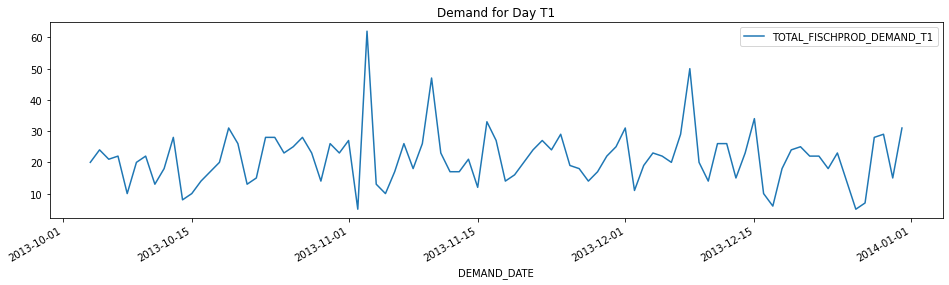

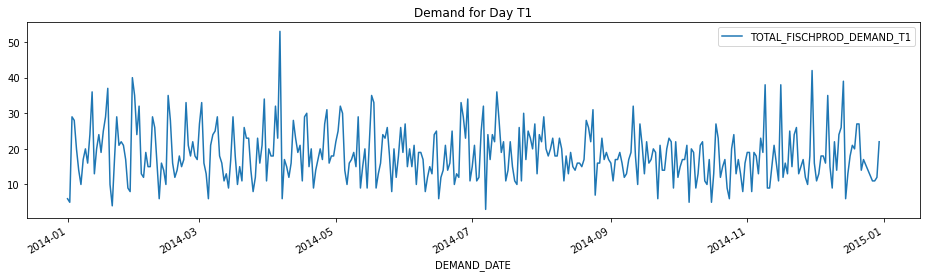

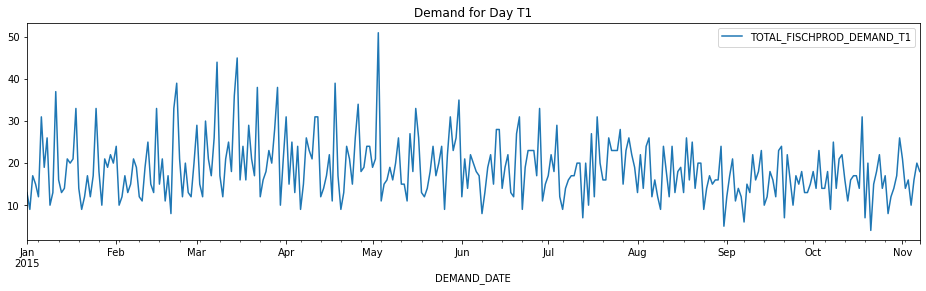

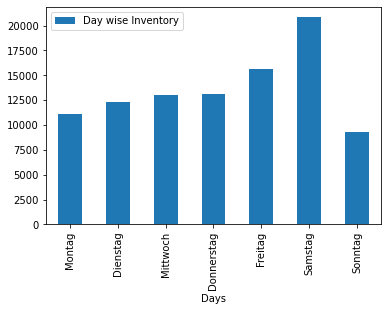

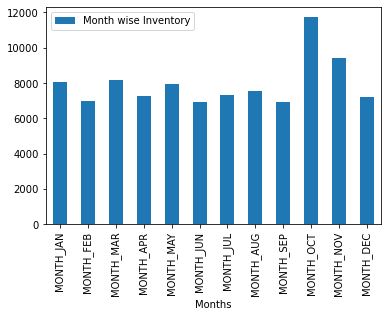

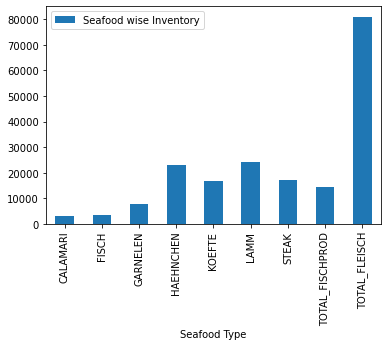

In [1]:
from Inventory_Environment_v1 import Env
import collections
import numpy as np
import random
import pickle

import jproperties
from jproperties import Properties


from datetime import datetime
start_time = datetime.now()
# do your work here


### Create an empty Q-Dictionary if it does not exist:

In [2]:
m=50

In [3]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

# print(len(Q_dict))
# print(len(rewards_tracked))
# print(len(States_track))

### Import the latest dictionary if Q-Dictionary already exists:

In [4]:
with open('PolicyNew.pkl', 'rb') as handle:
    Q_dict = pickle.load(handle)
    
with open('RewardsNew.pkl', 'rb') as handle:
    rewards_tracked = pickle.load(handle)    

with open('States_trackedNew.pkl', 'rb') as handle:
    States_track = pickle.load(handle)    
    
print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

357
7
7


In [5]:
#function to return valid actions

def valid_actions(state):
    
    state = int(state[0])
    valid_Actions = []
    
    for ix in range(0,m+1):
        valid_Actions.append(ix)
    return valid_Actions

In [6]:
#function to add Q-values to Q-dictionary

def add_to_dict(state,valid_act):
    
    if state not in Q_dict.keys():
        Q_dict[state] = {}
        for action in valid_act:
            Q_dict[state][action] = 0.0

In [7]:
#function to save Q-dictionary as a pickle file

def save_obj(obj, objname ):
    with open(objname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
#function to initialise Q-values
def initialise_tracking_states():
    sample_q_values = [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [9]:
#function to append latest Q-values of the 4 Q-values

def save_tracking_states():
    for st in States_track.keys():
        for action in States_track[st].keys():
            if st in Q_dict and action in Q_dict[st]:
                States_track[st][action].append(Q_dict[st][action])            

In [10]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action for max q-value of current state
    else:
        action = np.random.choice(np.arange(0,m+1))    #Exploration: randomly chose the action
    
    return action

### Training

In [11]:
#Parameters

# EPISODES = 1
EPISODES = 1500000  #1500000 Episodes for Convergence Analysis Testing
# STEPS = 1
STEPS = 30                 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 2000       # Q-values: stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

In [12]:
IsStore = "yes"
configs = Properties()
with open('keywords.properties', 'rb') as read_prop:
    configs.load(read_prop)
    
prop_view = configs.items()
for item in prop_view:
    if ((item[0]) == "IsStore"):
        IsStore = item[1].data

In [13]:
def training():
    for episode in range(0,EPISODES):
    
        env = Env()      #creating an instance of the class
        #this initialises the state and parameters to initial value for new episode
        
#         print("env.IsStore: ",env.IsStore)
#         print("IsStore: ",IsStore)
        if(env.IsStore == IsStore):
#             print("===============START====================")
#             print("Entered program after store check.........")
            initial_state = env.state    #tracking reward
            curr_state = env.state       #start is day's evening for action
            #curr_state is state_mon

#             print("DEBUG: curr_state post store check------------->: ",curr_state)
#             print("DEBUG: initial_state post store check---------->: ",initial_state)
            add_to_dict(curr_state,valid_actions(curr_state))

            #reward is not for the immediately next day
            time_step = 0
            reward = None
            curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
                           
#             print("===============NEXT====================")    
#             print("DEBUG: curr_action after getting from random choice------------>: ",curr_action)
                
            next_state = env.initial_step(curr_state, curr_action)   #returned state_tue
            add_to_dict(next_state,valid_actions(next_state))
            
            curr_state = next_state       
            #note that curr_state is always earlier day evening's stock
            
            total_reward = 0
            
#             print("===============NEXT====================")    
#             print("DEBUG: after making next_state as curr_state. next_state obtained from initial_step------------>: ")
            
#             print("DEBUG: time_step----------------->:",time_step)
#             print("DEBUG: STEPS--------------------->:",STEPS)
#             print("DEBUG: next_state----------------->:",next_state)
#             print("DEBUG: curr_state----------------->:",curr_state)
#             print("DEBUG: before loop---------------->:")
            
            while time_step < STEPS:    #episode runs for a few steps

#                 print("===============NEXT====================")
#                 print("===============when time_step is less than STEPS====================")
#                 print("DEBUG: time_step----------------->:",time_step)
#                 print("DEBUG: STEPS----------------->:",STEPS)                
#                 print("DEBUG: curr_action----------------->:",curr_action)
#                 print("DEBUG: curr_state--------------------->:",curr_state)
#                 print("DEBUG: episode--------------------->:",episode)
                
                curr_action = epsilon_greedy(curr_state, episode)
                next_state, reward = env.step(curr_state, curr_action)
                add_to_dict(next_state,valid_actions(next_state))

                #update
                max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #action corresponding to max q-value of next state
                Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 


                curr_state = next_state
                total_reward += reward
                time_step += 1
                
#                 print("===============NEXT====================") 
                   

#                 print("DEBUG: curr_state----------------->:",curr_state)
#                 print("DEBUG: curr_action---------------->:",curr_action)
#                 print("DEBUG: episode-------------------->:",episode)    
#                 print("DEBUG: next_state--------------------->:",next_state)
#                 print("DEBUG: total_reward--------------------->:",total_reward)
#                 print("DEBUG: reward--------------------->:",reward)
#                 print("DEBUG: time_step--------------------->:",time_step)
#                 print("DEBUG: before tracking awards")                
                    

            #TRACKING REWARDS as per threshold levels
            if initial_state in rewards_tracked:
                rewards_tracked[initial_state].append(total_reward)
                save_obj(rewards_tracked,'RewardsNew')

            if ((episode+1) % threshold) == 0:
                save_obj(rewards_tracked,'RewardsNew')   

            #TRACKING Q-VALUES
            if (episode == threshold-1):
                initialise_tracking_states()

            if ((episode+1) % threshold) == 0:
                save_tracking_states()
                save_obj(States_track,'States_trackedNew')   

            #SAVING POLICY
            if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
                save_obj(Q_dict,'PolicyNew')    
    return episode, total_reward

save_obj(rewards_tracked,'RewardsNew')   
save_obj(States_track,'States_trackedNew')   
save_obj(Q_dict,'PolicyNew')

In [14]:
# Training
training()

(1499999, -1535.0749999999996)

In [15]:
save_obj(rewards_tracked,'RewardsNew')   
save_obj(States_track,'States_trackedNew')   
save_obj(Q_dict,'PolicyNew')      

### Checking Values

In [16]:
Q_dict

defaultdict(dict,
            {(11, 3): {0: -575.2974522989749,
              1: -577.6964997381386,
              2: -577.265071751351,
              3: -577.0533706608418,
              4: -575.6770027972677,
              5: -575.7424198330355,
              6: -575.1693663935542,
              7: -574.4732493187162,
              8: -573.918900634888,
              9: -573.3546688383663,
              10: -572.7969151250957,
              11: -572.5705930675219,
              12: -571.8886706593022,
              13: -571.4983839442409,
              14: -570.6173444110093,
              15: -570.0746319011535,
              16: -569.6703749498953,
              17: -568.9727693486631,
              18: -569.1879828203566,
              19: -568.341807304115,
              20: -567.4512435345457,
              21: -567.1607676371023,
              22: -566.6216495141275,
              23: -565.8611440531547,
              24: -565.5248260186851,
              25: -564.2662146331347

In [17]:
States_track

defaultdict(dict,
            {(15,
              0): {12: [-133.20927562431123,
               -135.26818480103393,
               -136.79314048802593,
               -137.30403387109513,
               -139.36783054344144,
               -142.43818727820135,
               -143.43770795301356,
               -144.46239685450823,
               -146.99019738602257,
               -148.00380036808744,
               -149.02790340852877,
               -149.54014668539156,
               -150.07488999836784,
               -151.12838779926244,
               -152.20986431684662,
               -153.85295392675383,
               -155.49568766072926,
               -158.72102616998822,
               -160.30218770428414,
               -161.88962055189756,
               -164.99036771569462,
               -167.49288383425016,
               -168.48948170776694,
               -169.94731660062322,
               -172.39730620952506,
               -173.39184850287015,
               -173

In [18]:
rewards_tracked

{(15, 0): [-1836.3525,
  -1725.2599999999998,
  -1871.1325,
  -1748.4024999999995,
  -1591.7225000000003,
  -1665.6299999999999,
  -1654.3850000000004,
  -1849.3575000000003,
  -1555.7125,
  -1696.5,
  -1994.1974999999998,
  -1669.5775000000003,
  -1656.4899999999996,
  -1702.5950000000003,
  -1762.4849999999997,
  -1691.6625000000001,
  -1992.2000000000003,
  -1753.2575,
  -1994.245,
  -1861.32,
  -1650.305,
  -1605.4475,
  -1721.56,
  -1540.6425,
  -1797.07,
  -1713.1799999999998,
  -1796.0125000000003,
  -1728.1699999999998,
  -1526.9775000000002,
  -1628.315,
  -1715.255,
  -2015.9125000000001,
  -1525.6075,
  -1760.3625,
  -1737.6875000000002,
  -1681.4474999999993,
  -1736.3825000000002,
  -1754.3549999999996,
  -1769.1325000000002,
  -1978.0675000000003,
  -1768.32,
  -2001.8700000000003,
  -1840.4824999999992,
  -1630.6049999999998,
  -1991.1925,
  -1739.355,
  -1748.4525000000003,
  -1726.2275000000002,
  -1677.7275000000002,
  -1841.23,
  -1879.3625000000002,
  -1532.8025,
  

### Memory requirements

In [19]:
#No. of state,action pairs
state_space = 51*51*7
print(state_space)

18207


In [20]:
#4 q-values in tracking and saved as per threshold levels

no_of_q_values_tracked = 4*20000000/20000
print(no_of_q_values_tracked)


4000.0


In [21]:
# testing Q dictionary
Q_dict[(50,2)]

{0: -381.77291495695687,
 1: -383.9416280712406,
 2: -383.67596733991456,
 3: -383.19510400324305,
 4: -382.5679886668774,
 5: -381.98889734745376,
 6: -381.419168609036,
 7: -381.0248982190781,
 8: -380.17935106681733,
 9: -379.8284920342241,
 10: -379.22054940384794,
 11: -378.4986196209543,
 12: -377.71242664488784,
 13: -377.51002804884604,
 14: -377.3053080358972,
 15: -376.2683518849314,
 16: -375.8647215804744,
 17: -375.0662719978966,
 18: -374.81542224887687,
 19: -374.6181498265237,
 20: -373.6820421486314,
 21: -372.6502888375809,
 22: -372.77134116113314,
 23: -372.1092044998265,
 24: -371.62858920766485,
 25: -370.9764528006667,
 26: -369.9598801779017,
 27: -369.4409572217554,
 28: -369.24237928195856,
 29: -368.8951273947263,
 30: -367.7006020540887,
 31: -367.2882910824673,
 32: -367.2886469501584,
 33: -365.93752620556785,
 34: -365.7818529558246,
 35: -365.22742262867285,
 36: -364.95608968659894,
 37: -364.5756562913469,
 38: -363.61594184228676,
 39: -363.0143754712

In [22]:
# determining re-order levels as per inventory size
for x in range(0, 51):
    print(x, ':', max(Q_dict[(x,0)],key=Q_dict[(x,0)].get))

0 : 50
1 : 50
2 : 50
3 : 47
4 : 47
5 : 47
6 : 50
7 : 48
8 : 48
9 : 50
10 : 48
11 : 48
12 : 48
13 : 50
14 : 49
15 : 49
16 : 50
17 : 50
18 : 50
19 : 49
20 : 48
21 : 50
22 : 50
23 : 49
24 : 49
25 : 50
26 : 50
27 : 50
28 : 49
29 : 50
30 : 47
31 : 49
32 : 50
33 : 48
34 : 50
35 : 47
36 : 49
37 : 47
38 : 49
39 : 50
40 : 49
41 : 49
42 : 49
43 : 50
44 : 48
45 : 48
46 : 49
47 : 46
48 : 48
49 : 47
50 : 50


In [23]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 2:16:16.066799
